In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn U ipykernel

Note: you may need to restart the kernel to use updated packages.


# Import required libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.preprocessing import StandardScaler, LabelEncoder # type: ignore
from sklearn.decomposition import PCA # type: ignore
from sklearn.impute import SimpleImputer # type: ignore


# Load and Inspect Data

In [3]:
tel = pd.read_csv("C:/Users/vipin/OneDrive/Documents/Desktop/Project5/Notebook/cleaned_data.csv")
tel

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,13114483460844900352,2019-04-04 12:01:18,0.770771,2019-04-25 14:35:31,0.662663,0.980734,0.000229,0.338423,0.355932,...,0.681651,0.113631,0.352502,0.438681,0.329689,0.866255,0.203610,0.532305,0.438030,0.338155
1,1,13114483482878900224,2019-04-09 13:04:04,0.235235,2019-04-25 08:15:48,0.606607,0.733164,0.000308,0.427802,0.358700,...,0.870515,0.868242,0.788437,0.782626,0.721741,0.070697,0.624700,0.909194,0.668468,0.724204
2,2,13114483501243799552,2019-04-13 08:41:59,0.612613,2019-04-25 08:16:21,0.168168,0.555082,0.000229,0.340572,0.875828,...,0.311037,0.085690,0.568850,0.816909,0.053097,0.850601,0.952825,0.643147,0.589066,0.071099
3,3,13042425910865399808,2019-04-14 02:11:59,0.592593,2019-04-25 02:26:52,0.512513,0.509747,0.000155,0.859747,0.873634,...,0.524086,0.896566,0.294871,0.548574,0.887915,0.975290,0.637384,0.465891,0.736213,0.860877
4,4,13042425914669299712,2019-04-15 00:32:15,0.000000,2019-04-25 00:40:17,0.284284,0.462878,0.000036,0.308039,0.356458,...,0.702449,0.298616,0.525002,0.044256,0.961957,0.096093,0.076879,0.773921,0.244338,0.945168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122216,122216,13042425979329300480,2019-04-29 07:28:41,0.615616,2019-04-30 00:01:49,0.407407,0.028315,0.000222,0.357928,0.354017,...,0.281630,0.817879,0.966026,0.324810,0.930040,0.768458,0.381027,0.899250,0.667724,0.909809
122217,122217,7277825670196679680,2019-04-29 07:28:42,0.451451,2019-04-30 06:02:33,0.214214,0.040000,0.000358,0.262900,0.355545,...,0.696143,0.534408,0.768887,0.893976,0.624352,0.555426,0.003854,0.814516,0.720209,0.635442
122218,122218,7349883264234609664,2019-04-29 07:28:42,0.483483,2019-04-30 10:41:33,0.187187,0.049038,0.000308,0.330422,0.357345,...,0.596636,0.376532,0.831935,0.967345,0.743252,0.285950,0.844371,0.148419,0.470268,0.739067
122219,122219,13114483573367300096,2019-04-29 07:28:43,0.283283,2019-04-30 10:46:12,0.810811,0.049189,0.000274,0.110523,0.357961,...,0.974264,0.084309,0.428386,0.230136,0.656281,0.808894,0.143565,0.683305,0.413196,0.656298


Interpretation:-  The above  section installs necessary libraries and imports them. It then loads a dataset (cleaned_data.csv) for analysis. The warnings library is used to suppress warnings during execution.

# Initial Data Inspection

Interpretation : - 
The dataset is examined to understand its structure:
head() and tail() methods provide a glimpse of the first and last few records.
columns.tolist() lists all column names.
shape shows the number of rows and columns.
info() provides details about data types and missing values.
describe() gives statistical summaries of numerical columns.

In [4]:
tel.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,13114483460844900352,2019-04-04 12:01:18,0.770771,2019-04-25 14:35:31,0.662663,0.980734,0.000229,0.338423,0.355932,...,0.681651,0.113631,0.352502,0.438681,0.329689,0.866255,0.203610,0.532305,0.438030,0.338155
1,1,13114483482878900224,2019-04-09 13:04:04,0.235235,2019-04-25 08:15:48,0.606607,0.733164,0.000308,0.427802,0.358700,...,0.870515,0.868242,0.788437,0.782626,0.721741,0.070697,0.624700,0.909194,0.668468,0.724204
2,2,13114483501243799552,2019-04-13 08:41:59,0.612613,2019-04-25 08:16:21,0.168168,0.555082,0.000229,0.340572,0.875828,...,0.311037,0.085690,0.568850,0.816909,0.053097,0.850601,0.952825,0.643147,0.589066,0.071099
3,3,13042425910865399808,2019-04-14 02:11:59,0.592593,2019-04-25 02:26:52,0.512513,0.509747,0.000155,0.859747,0.873634,...,0.524086,0.896566,0.294871,0.548574,0.887915,0.975290,0.637384,0.465891,0.736213,0.860877
4,4,13042425914669299712,2019-04-15 00:32:15,0.000000,2019-04-25 00:40:17,0.284284,0.462878,0.000036,0.308039,0.356458,...,0.702449,0.298616,0.525002,0.044256,0.961957,0.096093,0.076879,0.773921,0.244338,0.945168


In [5]:
tel.tail()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
122216,122216,13042425979329300480,2019-04-29 07:28:41,0.615616,2019-04-30 00:01:49,0.407407,0.028315,0.000222,0.357928,0.354017,...,0.281630,0.817879,0.966026,0.324810,0.930040,0.768458,0.381027,0.899250,0.667724,0.909809
122217,122217,7277825670196679680,2019-04-29 07:28:42,0.451451,2019-04-30 06:02:33,0.214214,0.040000,0.000358,0.262900,0.355545,...,0.696143,0.534408,0.768887,0.893976,0.624352,0.555426,0.003854,0.814516,0.720209,0.635442
122218,122218,7349883264234609664,2019-04-29 07:28:42,0.483483,2019-04-30 10:41:33,0.187187,0.049038,0.000308,0.330422,0.357345,...,0.596636,0.376532,0.831935,0.967345,0.743252,0.285950,0.844371,0.148419,0.470268,0.739067
122219,122219,13114483573367300096,2019-04-29 07:28:43,0.283283,2019-04-30 10:46:12,0.810811,0.049189,0.000274,0.110523,0.357961,...,0.974264,0.084309,0.428386,0.230136,0.656281,0.808894,0.143565,0.683305,0.413196,0.656298
122220,122220,13114483573367300096,2019-04-29 07:28:43,0.696697,2019-04-30 10:40:34,0.327327,0.049006,0.000340,0.098523,0.869979,...,0.379081,0.377310,0.142835,0.598428,0.417966,0.152754,0.965937,0.084958,0.341755,0.408770


In [6]:
tel.columns.tolist()

['Unnamed: 0',
 'Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 

In [7]:
tel.shape

(122221, 56)

In [8]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122221 entries, 0 to 122220
Data columns (total 56 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Unnamed: 0                                122221 non-null  int64  
 1   Bearer Id                                 122221 non-null  object 
 2   Start                                     122221 non-null  object 
 3   Start ms                                  122221 non-null  float64
 4   End                                       122221 non-null  object 
 5   End ms                                    122221 non-null  float64
 6   Dur. (ms)                                 122221 non-null  float64
 7   IMSI                                      122221 non-null  float64
 8   MSISDN/Number                             122221 non-null  float64
 9   IMEI                                      122221 non-null  float64
 10  Last Location Name  

In [9]:
tel.describe()

,Unnamed: 0,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,122221.000000,122221.000000,122221.000000,122221.000000,122221.000000,122221.000000,122221.000000,122221.000000,122221.000000,122221.000000,...,122221.000000,122221.000000,122221.000000,122221.000000,122221.000000,122221.000000,122221.000000,122221.000000,122221.000000,122221.000000
mean,61110.000000,0.499189,0.499629,0.047769,0.000270,0.389339,0.512207,0.001118,0.002478,0.043127,...,0.500338,0.499952,0.500055,0.499570,0.499622,0.500640,0.499593,0.498543,0.496857,0.500791
std,35282.307963,0.289134,0.288245,0.039593,0.002868,0.237048,0.240051,0.006109,0.011905,0.067742,...,0.288235,0.288320,0.289216,0.289015,0.289106,0.288594,0.288346,0.288023,0.152458,0.273434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30555.000000,0.249249,0.251251,0.023059,0.000221,0.269597,0.355957,0.000330,0.000281,0.000119,...,0.251449,0.250186,0.248482,0.248244,0.248753,0.249893,0.249420,0.250116,0.390186,0.263867
50%,61110.000000,0.498498,0.500501,0.042791,0.000246,0.331585,0.358107,0.000464,0.000702,0.001727,...,0.499464,0.499907,0.500680,0.499212,0.500696,0.500697,0.500730,0.498185,0.496722,0.501350
75%,91665.000000,0.749750,0.749750,0.058245,0.000284,0.432556,0.871914,0.000722,0.002107,0.070431,...,0.750349,0.750144,0.751376,0.749639,0.749238,0.750349,0.749320,0.747421,0.603753,0.736629
max,122220.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Identifying numerical and categorical columns

Interpretation : - The code identifies numerical and categorical columns, then fills missing values:

For numerical columns, missing values are replaced with the mean of each column.
For categorical columns, missing values are replaced with the most frequent value.
isnull().sum() checks if there are any remaining missing values.

In [10]:
numerical_columns = tel.select_dtypes(include=['float','int']).columns
tel[numerical_columns]

,Unnamed: 0,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,0.770771,0.662663,0.980734,0.000229,0.338423,0.355932,0.000433,0.000702,0.000061,...,0.681651,0.113631,0.352502,0.438681,0.329689,0.866255,0.203610,0.532305,0.438030,0.338155
1,1,0.235235,0.606607,0.733164,0.000308,0.427802,0.358700,0.000671,0.000702,0.000042,...,0.870515,0.868242,0.788437,0.782626,0.721741,0.070697,0.624700,0.909194,0.668468,0.724204
2,2,0.612613,0.168168,0.555082,0.000229,0.340572,0.875828,0.001052,0.000702,0.000058,...,0.311037,0.085690,0.568850,0.816909,0.053097,0.850601,0.952825,0.643147,0.589066,0.071099
3,3,0.592593,0.512513,0.509747,0.000155,0.859747,0.873634,0.000402,0.002528,0.009779,...,0.524086,0.896566,0.294871,0.548574,0.887915,0.975290,0.637384,0.465891,0.736213,0.860877
4,4,0.000000,0.284284,0.462878,0.000036,0.308039,0.356458,0.001001,0.000983,0.010168,...,0.702449,0.298616,0.525002,0.044256,0.961957,0.096093,0.076879,0.773921,0.244338,0.945168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122216,122216,0.615616,0.407407,0.028315,0.000222,0.357928,0.354017,0.003229,0.001264,0.167707,...,0.281630,0.817879,0.966026,0.324810,0.930040,0.768458,0.381027,0.899250,0.667724,0.909809
122217,122217,0.451451,0.214214,0.040000,0.000358,0.262900,0.355545,0.000330,0.000000,0.000138,...,0.696143,0.534408,0.768887,0.893976,0.624352,0.555426,0.003854,0.814516,0.720209,0.635442
122218,122218,0.483483,0.187187,0.049038,0.000308,0.330422,0.357345,0.000279,0.000281,0.000061,...,0.596636,0.376532,0.831935,0.967345,0.743252,0.285950,0.844371,0.148419,0.470268,0.739067
122219,122219,0.283283,0.810811,0.049189,0.000274,0.110523,0.357961,0.000444,0.000843,0.000114,...,0.974264,0.084309,0.428386,0.230136,0.656281,0.808894,0.143565,0.683305,0.413196,0.656298


In [11]:
categorical_columns = tel.select_dtypes(include=['object']).columns.tolist()
tel[categorical_columns]

,Bearer Id,Start,End,Last Location Name,Handset Manufacturer,Handset Type
0,13114483460844900352,2019-04-04 12:01:18,2019-04-25 14:35:31,9164566995485190,Samsung,Samsung Galaxy A5 Sm-A520F
1,13114483482878900224,2019-04-09 13:04:04,2019-04-25 08:15:48,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530)
2,13114483501243799552,2019-04-13 08:41:59,2019-04-25 08:16:21,9164567010589190,Huawei,Huawei Mate 20 Lite
3,13042425910865399808,2019-04-14 02:11:59,2019-04-25 02:26:52,CELL_208_20_520025_1,undefined,undefined
4,13042425914669299712,2019-04-15 00:32:15,2019-04-25 00:40:17,L20434C,Samsung,Samsung Galaxy Note 8 (Sm-N950F Ds)
...,...,...,...,...,...,...
122216,13042425979329300480,2019-04-29 07:28:41,2019-04-30 00:01:49,T85721A,undefined,undefined
122217,7277825670196679680,2019-04-29 07:28:42,2019-04-30 06:02:33,D20434A,Apple,Apple iPhone 8 Plus (A1897)
122218,7349883264234609664,2019-04-29 07:28:42,2019-04-30 10:41:33,D10223C,Apple,Apple iPhone Se (A1723)
122219,13114483573367300096,2019-04-29 07:28:43,2019-04-30 10:46:12,T51102A,Apple,Apple iPhone Xs (A2097)


In [12]:
# Initializing SimpleImputer for numerical data
imputer = SimpleImputer(strategy='mean')
tel[numerical_columns] = imputer.fit_transform(tel[numerical_columns])

In [13]:
# Initializing SimpleImputer for categorical data
imputer_cat = SimpleImputer(strategy='most_frequent')
tel[categorical_columns] = imputer_cat.fit_transform(tel[categorical_columns])

In [14]:
print(tel.isnull().sum())

Unnamed: 0                                  0
Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)               

# Convert datetime columns

Interpretation: Below code Converts 'Start' and 'End' columns to datetime objects and then to numeric timestamps in seconds. It calculates the duration of each call or session.

In [15]:
tel['Start'] = pd.to_datetime(tel['Start'])
tel['End'] = pd.to_datetime(tel['End'])

In [16]:
# Convert datetime columns to numeric values

tel['Start_seconds'] = tel['Start'].astype(np.int64) // 10**9
tel['End_seconds'] = tel['End'].astype(np.int64) // 10**9

In [17]:
#calculate durations

tel['Duration_seconds'] = tel['End_seconds'] - tel['Start_seconds']

In [18]:
# Aggregation of user data
user_agg = tel.groupby('Bearer Id').agg({
    'Start_seconds': 'sum',
    'End_seconds': 'sum',
    'Duration_seconds': 'sum'
}).reset_index()

In [19]:
user_agg

,Bearer Id,Start_seconds,End_seconds,Duration_seconds
0,,1095601340903,1095627600484,26259581
1,12682137775163799552,1556374420,1556407930,33510
2,12682137806777399296,1556135688,1556150048,14360
3,12682137860162400256,1556131565,1556147208,15643
4,12682137887215099904,1556094230,1556151089,56859
...,...,...,...,...
111109,7421940858146069504,1556518117,1556623179,105062
111110,7421940858222040064,1556521268,1556604318,83050
111111,7421940858230880256,1556521573,1556586053,64480
111112,7421940858243090432,1556521987,1556613487,91500


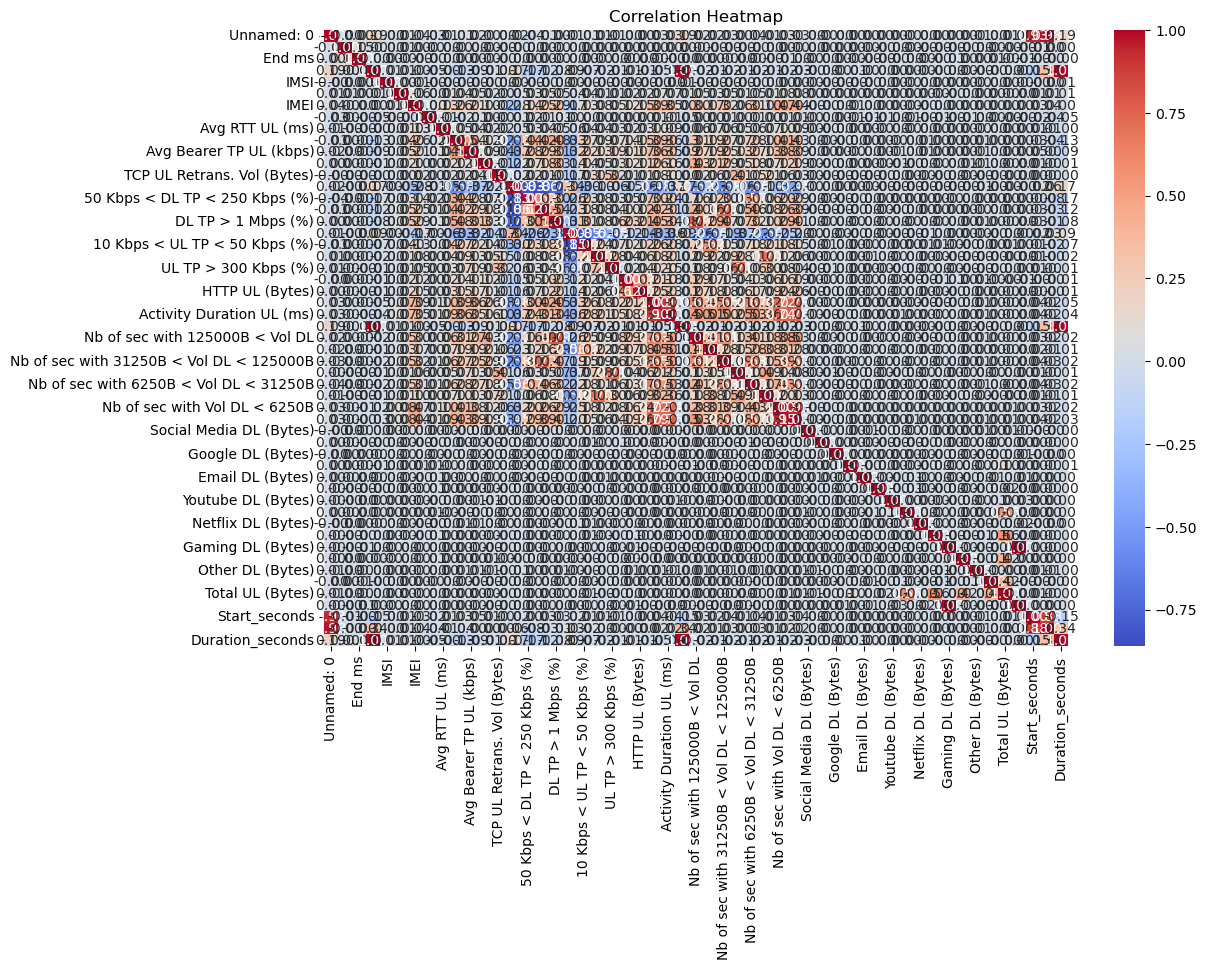

In [20]:
# Filter only numeric columns for correlation calculation
numeric_df = tel.select_dtypes(include=[np.number])

# Check for any missing values and handle them if necessary
numeric_df = numeric_df.dropna()

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Interpretation :- In this analysis, we visualized the correlation matrix of a large dataset using a heatmap. Due to the size of the dataset, the  correlation matrix resulted in an overwhelming visual display, making it challenging to extract meaningful insights. 

# Task 1

In [21]:
# Top 10 handsets used by customers
Top_10_Handsets_Type = tel['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:")
Top_10_Handsets_Type

Top 10 Handsets:


Handset Type
Huawei B528S-23A               19673
Apple iPhone 6S (A1688)         9278
Apple iPhone 6 (A1586)          8831
Apple iPhone 7 (A1778)          6189
Apple iPhone Se (A1723)         5090
Apple iPhone 8 (A1905)          4920
undefined                       4899
Apple iPhone Xr (A2105)         4505
Apple iPhone X (A1901)          3757
Apple iPhone 8 Plus (A1897)     2974
Name: count, dtype: int64

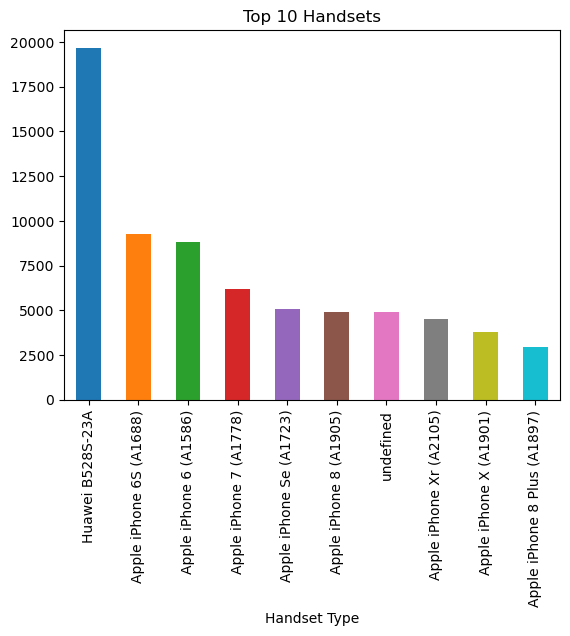

In [22]:
# Visualization of Top 10 Handsets
Top_10_Handsets_Type.plot(kind='bar', color=sns.color_palette("tab10"))
plt.title('Top 10 Handsets')
plt.show()


In [23]:
# Top 3 handset manufacturers
top_3_manufacturers = tel['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Manufacturers:")
print(top_3_manufacturers)

Top 3 Manufacturers:
Handset Manufacturer
Apple      58799
Huawei     33522
Samsung    19599
Name: count, dtype: int64


Index(['Apple', 'Huawei', 'Samsung'], dtype='object', name='Handset Manufacturer')


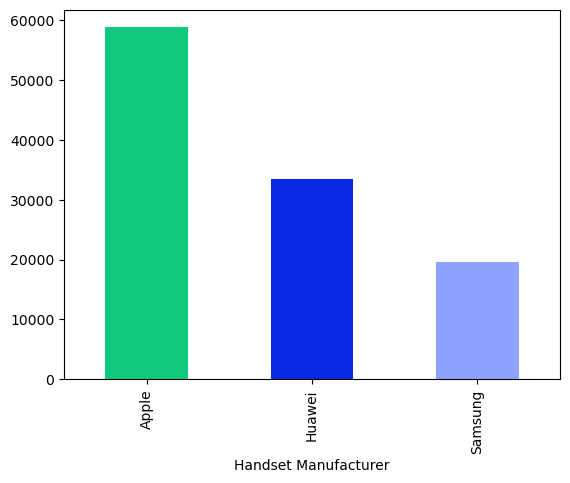

In [24]:
# Visualization of Top 3 Manufacturers

num_colors = len(tel)
colors = np.random.rand(num_colors, 3)

top_3_manufacturers[:3].plot(kind='bar', color=colors)
print(top_3_manufacturers[:3].keys())

Interpretation :- above code identifies and displays the top 10 handsets and top 3 handset manufacturers based on usage. It also visualizes these top handsets in a bar plot.

In [25]:
# Top 5 handsets per top 3 manufacturers
top_5_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_5_handsets = tel[tel['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets

print("Top 5 Handsets per Manufacturer:")
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"{manufacturer}:")
    print(handsets)

Top 5 Handsets per Manufacturer:
Apple:
Handset Type
Apple iPhone 6S (A1688)    9278
Apple iPhone 6 (A1586)     8831
Apple iPhone 7 (A1778)     6189
Apple iPhone Se (A1723)    5090
Apple iPhone 8 (A1905)     4920
Name: count, dtype: int64
Huawei:
Handset Type
Huawei B528S-23A                  19378
Huawei E5180                       2065
Huawei P20 Lite Huawei Nova 3E     1994
Huawei P20                         1401
Huawei Y6 2018                      985
Name: count, dtype: int64
Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    1884
Samsung Galaxy J5 (Sm-J530)     1835
Samsung Galaxy J3 (Sm-J330)     1569
Samsung Galaxy A5 Sm-A520F      1513
Samsung Galaxy S7 (Sm-G930X)    1355
Name: count, dtype: int64


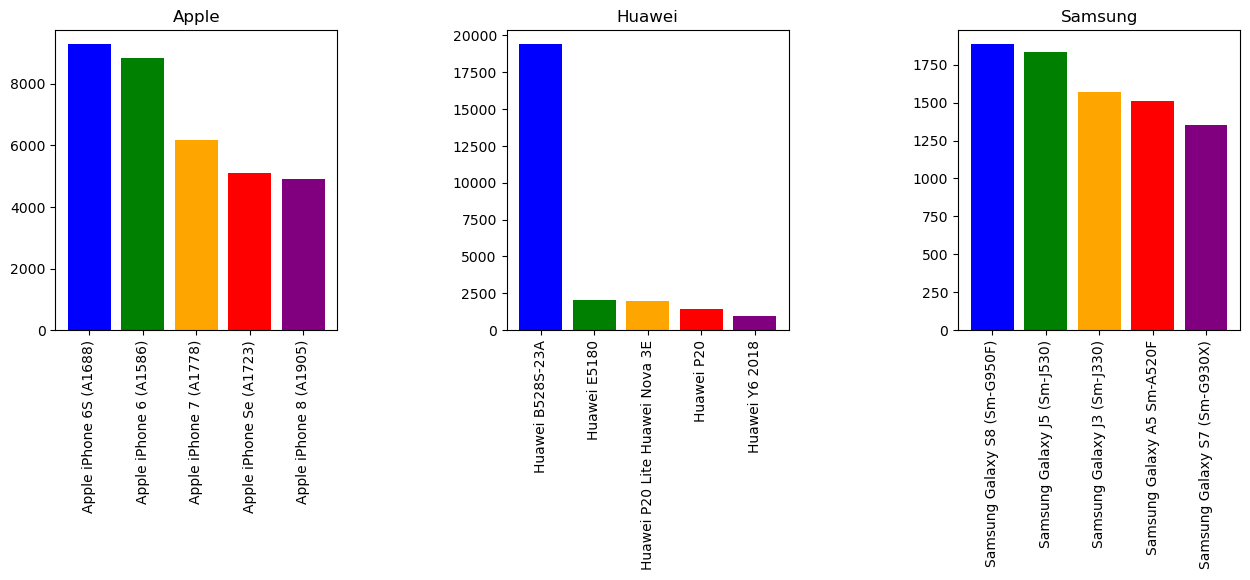

In [26]:
# Visualization of Top 5 Handsets per Manufacturer

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, (manufacturer, handsets) in enumerate(top_5_handsets_per_manufacturer.items()):
    ax[i].bar(handsets.index, handsets.values, tick_label=handsets.index,
              width=0.8, color=['blue', 'green', 'orange', 'red', 'purple'])
    ax[i].set_title(manufacturer)
    ax[i].tick_params(axis='x', labelrotation=90)

plt.subplots_adjust(left=0.2, right=0.99, bottom=0.2, top=0.8, wspace=0.6)
plt.show()

Interpretation: For each of the top 3 manufacturers, identifies and displays the top 5 handsets. It also visualizes these top 5 handsets per manufacturer in a set of bar plots.

# User Overview Analysis
Top Handsets and Manufacturers:
    
Interpretation: The top three manufacturers and ten handsets illustrate an overview of consumer preferences today. This implies that the user base perceives some gadgets as "essential tools" or "status symbols".

- The most used handset model by customer is Huawei B528S-23A which is manufactured by Huawei
- The Top 3 Manufacturers:
Apple      60137
Samsung    40839
Huawei     34423
- Apple's Handset are not prefered by more customers.
- Huawei Handsets manufacturers can be recommended to increase the manufacturing capability to increase there acces to customers.


Suggestion: To foster a feeling of urgency, come up with exclusive bundles or time-limited offers showcasing these top phones. Work together on co-branded campaigns with these manufacturers, maybe including customer input into future product development.

In [27]:
handset_manufacturer = tel['Last Location Name'].value_counts()
print(len(handset_manufacturer), "users")
print("Number of posts per user")


41492 users
Number of posts per user


<Axes: xlabel='Last Location Name'>

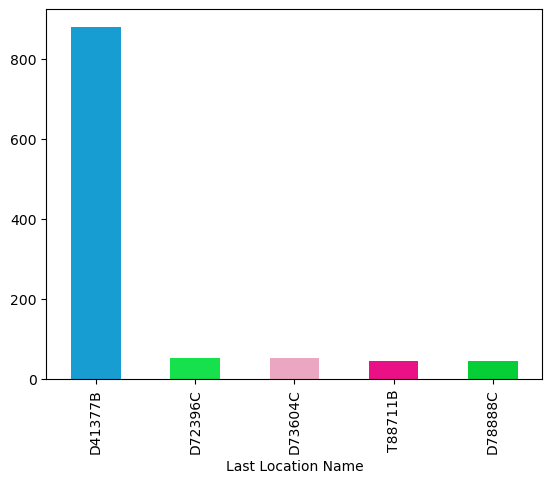

In [28]:
num_colors = len(tel)
colors = np.random.rand(num_colors, 3)
handset_manufacturer[:5].plot(
    kind='bar', color=colors)

# Task 1.1

In [29]:
# Aggregating 
session_count = tel.groupby('IMEI').agg(
    {'Bearer Id': ['count']}).reset_index()

session_count[session_count['Bearer Id']['count'] > 10]

,IMEI,Bearer Id
,,count
5051,0.353499,16
5233,0.353535,11
36021,0.357175,13
46269,0.358107,295
48637,0.358216,11
84163,0.875436,15
87916,0.877708,16


In [30]:
# Aggregating the required columns per user (MSISDN)
user_behavior = tel.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Number of xDR sessions
    'Dur. (ms)': 'sum',  # Session duration
    'Total UL (Bytes)': 'sum',  # Total upload data
    'Total DL (Bytes)': 'sum',  # Total download data
    'Social Media DL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum'
}).rename(columns={
    'Bearer Id': 'xDR_sessions',
    'Dur. (ms)': 'session_duration',
    'Total UL (Bytes)': 'total_upload',
    'Total DL (Bytes)': 'total_download'
})


In [31]:
# Calculate total data volume
user_behavior['total_data_volume'] = user_behavior['total_upload'] + user_behavior['total_download']

print("Aggregated User Behavior:")
user_behavior.head(10)

Aggregated User Behavior:


,xDR_sessions,session_duration,total_upload,total_download,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes),total_data_volume
MSISDN/Number,,,,,,,,,,,,
0.000000e+00,1,0.059161,0.428615,0.936278,0.615298,0.291107,0.233507,0.640617,0.441334,0.961644,0.447083,1.364893
1.693162e-07,1,0.093990,0.429309,0.127345,0.724623,0.366184,0.788818,0.228909,0.033128,0.124519,0.331437,0.556654
3.232881e-05,1,0.023073,0.216086,0.442497,0.070121,0.517989,0.607508,0.188876,0.049758,0.460101,0.029918,0.658583
3.648235e-05,2,0.012321,1.156914,1.511565,0.797871,1.197647,0.626798,0.444552,1.073623,1.551945,0.921970,2.668478
4.740853e-05,1,0.065299,0.575054,0.157292,0.276115,0.176981,0.940966,0.465049,0.356079,0.144617,0.238482,0.732346
5.244569e-05,2,0.061590,1.256942,0.603788,0.754957,0.379104,0.205352,0.128583,0.550879,0.627702,0.243253,1.860730
5.416530e-05,1,0.042791,0.462702,0.321576,0.485210,0.962797,0.357082,0.219272,0.059888,0.324298,0.211160,0.784279
9.833037e-05,1,0.063553,0.577791,0.760049,0.261728,0.968238,0.554054,0.585765,0.965676,0.753176,0.158552,1.337840
1.022405e-04,1,0.130268,0.421176,0.081085,0.127043,0.783651,0.712023,0.469169,0.434987,0.055060,0.641054,0.502261


In [32]:
 # Descriptive statistics
descriptive_stats = user_behavior.describe(percentiles=[.25, .5, .75])
print("Descriptive Statistics of User Behavior:")
descriptive_stats


Descriptive Statistics of User Behavior:


,xDR_sessions,session_duration,total_upload,total_download,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes),total_data_volume
count,88451.000000,88451.000000,88451.000000,88451.000000,88451.000000,8.845100e+04,88451.000000,88451.000000,88451.000000,88451.000000,88451.000000,88451.000000
mean,1.381793,0.066007,0.686553,0.691990,0.691868,6.932180e-01,0.690061,0.691364,0.690972,0.690374,0.690334,1.378543
std,2.601102,0.111505,1.321166,1.360044,1.358671,1.306966e+00,1.343109,1.346964,1.335313,1.363289,1.309600,2.656047
min,1.000000,0.000000,0.000000,0.001920,0.000000,3.489629e-07,0.000023,0.000000,0.000000,0.000023,0.000038,0.067185
25%,1.000000,0.025180,0.429241,0.337668,0.322835,3.259048e-01,0.324275,0.324075,0.320591,0.324197,0.321807,0.844029
50%,1.000000,0.042791,0.566357,0.620177,0.624499,6.252141e-01,0.622147,0.619874,0.622223,0.621759,0.620600,1.154248
75%,2.000000,0.083715,0.776971,0.885466,0.902859,9.012410e-01,0.897986,0.900031,0.899052,0.900226,0.899219,1.549191
max,739.000000,20.095585,372.389892,376.182793,374.595120,3.574558e+02,369.079294,370.494376,366.467955,375.898069,358.509821,748.572685


Interpretation: Aggregates and summarizes user behavior data by MSISDN/Number. Calculates session counts, total data uploads and downloads, and overall data volume. Provides descriptive statistics for the aggregated data.


In [33]:
# Save descriptive stats to a CSV (optional)
descriptive_stats.to_csv('C:/Users/vipin/OneDrive/Documents/Desktop/Project5/Notebook/user_behavior_stats.csv')

# MEAN,MODE, MEDIAN

In [34]:
# Describe all relevant variables
tel.describe(include='all')

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Start_seconds,End_seconds,Duration_seconds
count,122221.000000,122221,122221,122221.000000,122221,122221.000000,122221.000000,122221.000000,122221.000000,122221.000000,...,122221.000000,122221.000000,122221.000000,122221.000000,122221.000000,122221.000000,122221.000000,1.222210e+05,1.222210e+05,1.222210e+05
unique,NaN,111114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,61110.000000,NaN,2019-04-26 12:36:34.304497920,0.499189,2019-04-27 15:10:14.042930688,0.499629,0.047769,0.000270,0.389339,0.512207,...,0.499570,0.499622,0.500640,0.499593,0.498543,0.496857,0.500791,1.556282e+09,1.556378e+09,9.561974e+04
min,0.000000,NaN,2019-04-04 12:01:18,0.000000,2019-04-24 22:59:58,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.554379e+09,1.556147e+09,7.143000e+03
25%,30555.000000,NaN,2019-04-24 21:01:34,0.249249,2019-04-26 04:23:55,0.251251,0.023059,0.000221,0.269597,0.355957,...,0.248244,0.248753,0.249893,0.249420,0.250116,0.390186,0.263867,1.556140e+09,1.556253e+09,4.985300e+04
50%,61110.000000,NaN,2019-04-26 08:48:43,0.498498,2019-04-27 19:56:23,0.500501,0.042791,0.000246,0.331585,0.358107,...,0.499212,0.500696,0.500697,0.500730,0.498185,0.496722,0.501350,1.556269e+09,1.556395e+09,8.640000e+04
75%,91665.000000,NaN,2019-04-27 18:11:22,0.749750,2019-04-29 04:20:20,0.749750,0.058245,0.000284,0.432556,0.871914,...,0.749639,0.749238,0.750349,0.749320,0.747421,0.603753,0.736629,1.556389e+09,1.556512e+09,1.150240e+05
max,122220.000000,NaN,2019-04-29 07:28:43,1.000000,2019-04-30 23:59:27,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.556523e+09,1.556669e+09,1.859337e+06


In [35]:
#convert the data type of 'IMEI', 'IMSI', 'MSISDN/Number' to str

to_string = ['IMEI', 'IMSI', 'MSISDN/Number']

for col in to_string:
    tel[col] = tel[col].astype('category')

In [36]:
col = ['session_duration', 'total_upload', 'total_download', 'total_data_volume',
       'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
       'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
       'Other DL (Bytes)']

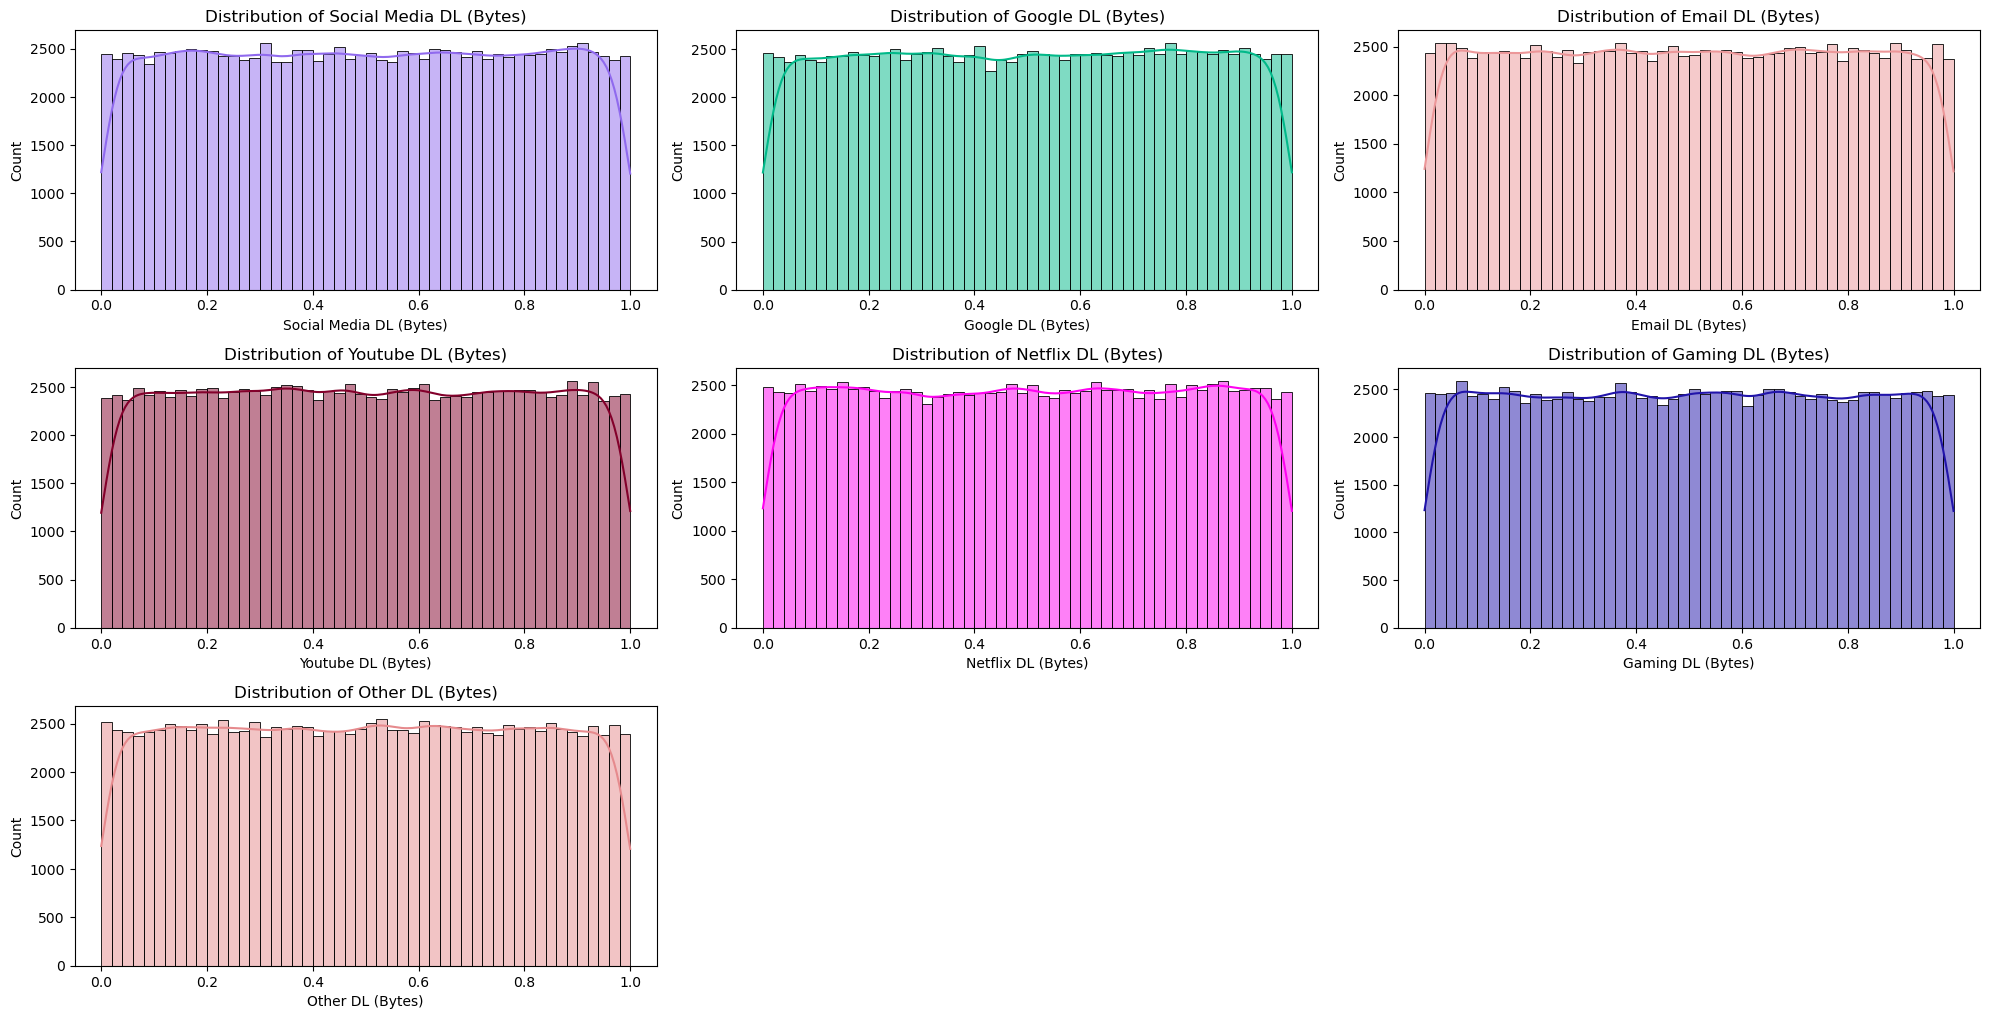

In [37]:
col = [c for c in col if c in tel.columns]

# Generate random colors for plotting
num_colors = len(col)
colors = np.random.rand(num_colors, 3)

# Create subplots
plt.figure(figsize=(20, 20))

for i, column in enumerate(col):
    plt.subplot(6, 3, i + 1)
    sns.histplot(tel[column], kde=True, color=colors[i])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


Interpretation: Converts certain columns to categorical types and plots histograms with KDE for various columns to visualize their distributions.

In [38]:
import pandas as pd
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.palettes import Viridis256
from bokeh.io import output_notebook

# Prepare data (assuming 'tel' is your DataFrame)
categorical_df = tel.select_dtypes(include='object')
columns = categorical_df.columns

# Prepare the output file (or use output_notebook() for inline display in Jupyter notebooks)
output_file("count_plots_bokeh.html")
# output_notebook()  # Uncomment this line if running in a Jupyter notebook

# Number of plots
num_cols = len(columns)
cols_per_row = 3
rows = (num_cols // cols_per_row) + 1

# Create a list to hold Bokeh plots
plots = []

# Generate a plot for each categorical column
for column in columns:
    counts = tel[column].value_counts()
    categories = counts.index.tolist()
    values = counts.values.tolist()

    # Create a ColumnDataSource
    source = ColumnDataSource(data=dict(categories=categories, values=values))

    # Create a Bokeh figure
    p = figure(x_range=FactorRange(*categories), height=300, width=400, 
               title=f'Count Plot of {column}', toolbar_location=None, tools="", 
               y_axis_label='Count')

    # Create a color palette that matches the number of categories
    num_colors = len(categories)
    color_palette = Viridis256[:num_colors] if num_colors <= len(Viridis256) else Viridis256 * (num_colors // len(Viridis256) + 1)

    # Create a color mapping dictionary
    color_mapping = dict(zip(categories, color_palette))

    # Add the color to the data source
    source.data['color'] = [color_mapping[cat] for cat in categories]

    p.vbar(x='categories', top='values', width=0.9, source=source, 
           color='color', legend_field='categories')

    p.xgrid.grid_line_color = None
    p.xaxis.major_label_orientation = "vertical"
    p.y_range.start = 0
    p.legend.orientation = "horizontal"
    p.legend.location = "top_center"

    plots.append(p)

# Arrange plots in a grid layout
grid = gridplot([plots[i:i + cols_per_row] for i in range(0, len(plots), cols_per_row)])

# Show the plot
show(grid)


Interpretation: Above creates count plots for each categorical column to visualize the frequency of different values.

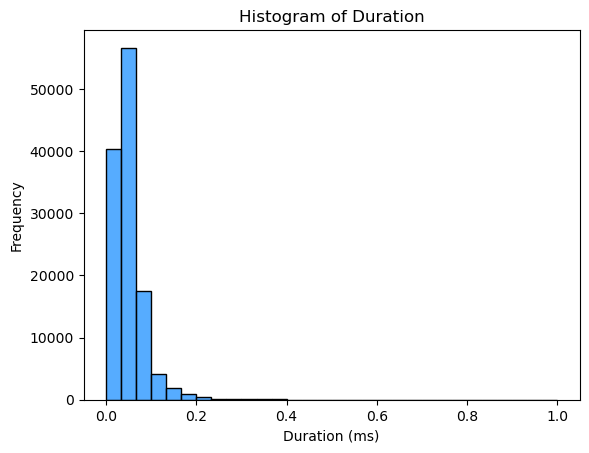

In [39]:
sns.histplot(tel['Dur. (ms).1'], bins=30, color='dodgerblue', edgecolor='black')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.title('Histogram of Duration')

# Show the plot
plt.show()

<Axes: ylabel='Google DL (Bytes)'>

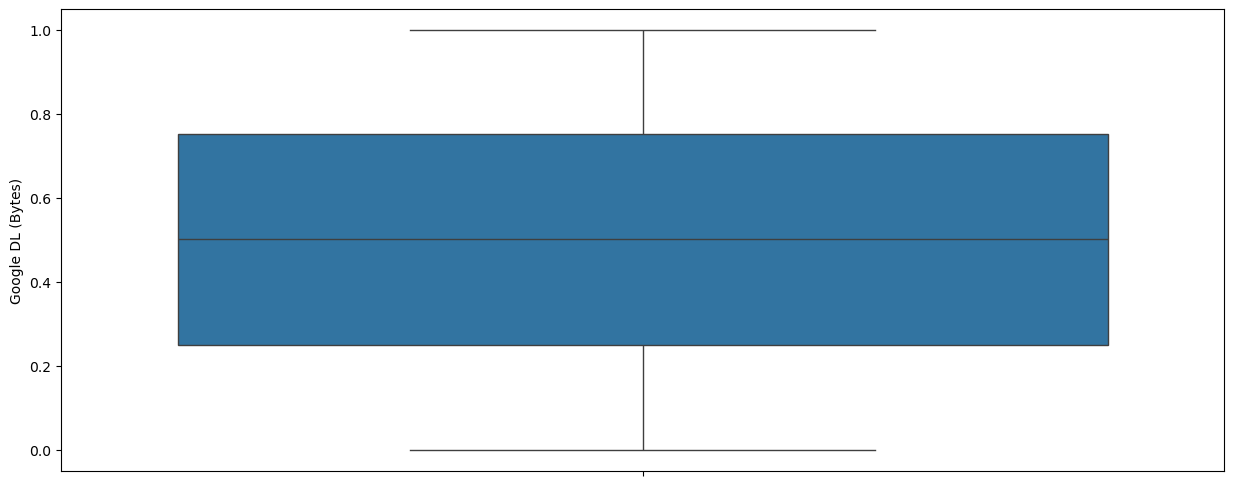

In [40]:
plt.figure(figsize=(15, 6))
sns.boxplot(tel['Google DL (Bytes)'])

Text(0.5, 1.0, 'Violin and strip plot of Dur (ms) Distribution')

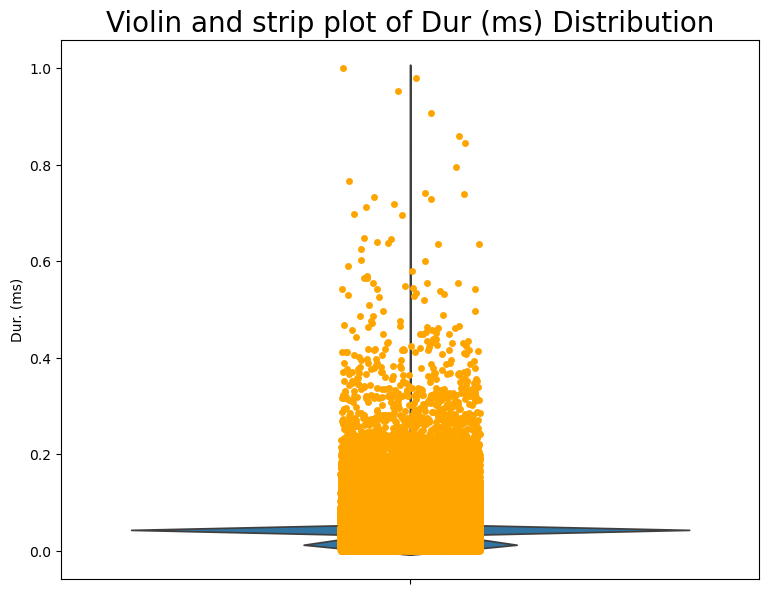

In [41]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=tel, y='Dur. (ms)', orient='hor', color='orange')
sns.violinplot(data=tel, y='Dur. (ms)', orient='hor')
plt.title('Violin and strip plot of Dur (ms) Distribution', size=20)

Interpretation :- Above Ploted a histogram for duration to show its distribution.
Uses a box plot to show the distribution and potential outliers for Google download bytes.
Combines strip and violin plots to visualize the distribution and density of duration.

In [42]:
# total speed kbps
tel['Avg Throughput (kbps)']=tel['Avg Bearer TP UL (kbps)']+tel['Avg Bearer TP DL (kbps)']
tel.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Start_seconds,End_seconds,Duration_seconds,Avg Throughput (kbps)
0,0.0,13114483460844900352,2019-04-04 12:01:18,0.770771,2019-04-25 14:35:31,0.662663,0.980734,0.000229,0.338423,0.355932,...,0.329689,0.866255,0.203610,0.532305,0.438030,0.338155,1554379278,1556202931,1823653,0.000812
1,1.0,13114483482878900224,2019-04-09 13:04:04,0.235235,2019-04-25 08:15:48,0.606607,0.733164,0.000308,0.427802,0.358700,...,0.721741,0.070697,0.624700,0.909194,0.668468,0.724204,1554815044,1556180148,1365104,0.000486
2,2.0,13114483501243799552,2019-04-13 08:41:59,0.612613,2019-04-25 08:16:21,0.168168,0.555082,0.000229,0.340572,0.875828,...,0.053097,0.850601,0.952825,0.643147,0.589066,0.071099,1555144919,1556180181,1035262,0.000706
3,3.0,13042425910865399808,2019-04-14 02:11:59,0.592593,2019-04-25 02:26:52,0.512513,0.509747,0.000155,0.859747,0.873634,...,0.887915,0.975290,0.637384,0.465891,0.736213,0.860877,1555207919,1556159212,951293,0.016876
4,4.0,13042425914669299712,2019-04-15 00:32:15,0.000000,2019-04-25 00:40:17,0.284284,0.462878,0.000036,0.308039,0.356458,...,0.961957,0.096093,0.076879,0.773921,0.244338,0.945168,1555288335,1556152817,864482,0.053417


Interpretation:- Above calculates average throughput by summing up upload and download speeds and adds this as a new column in the DataFrame.

In [43]:
columns = ['MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']

In [44]:
dfPair = tel[['Last Location Name', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)']]



In [45]:
# Convert all entries in 'Last Location Name' to strings
dfPair['Last Location Name'] = dfPair['Last Location Name'].astype(str)



In [46]:
# Check for and handle missing values, if any
dfPair = dfPair.dropna(subset=['Last Location Name'])



In [47]:
# Encode categorical 'Last Location Name'
le = LabelEncoder()
dfPair['Last Location Encoded'] = le.fit_transform(dfPair['Last Location Name'])



In [48]:
# Check the number of unique location names
num_locations = len(le.classes_)
print(f"Number of unique locations: {num_locations}")



Number of unique locations: 41492


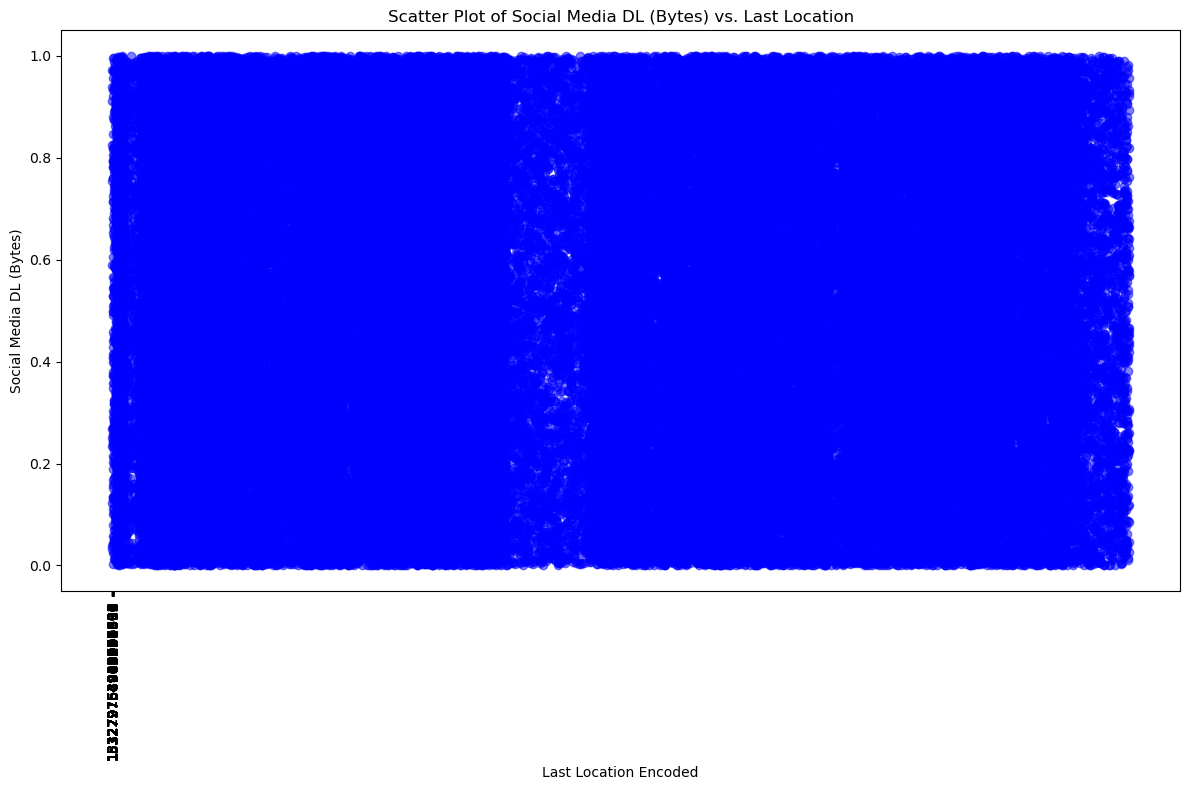

In [49]:
# Plot only 50 locations 
max_labels = 50
labels_to_plot = le.classes_[:max_labels]
ticks_to_plot = range(min(max_labels, num_locations))

plt.figure(figsize=(12, 8))
plt.scatter(dfPair['Last Location Encoded'], dfPair['Social Media DL (Bytes)'], alpha=0.5, c='blue')
plt.xlabel('Last Location Encoded')
plt.ylabel('Social Media DL (Bytes)')
plt.title('Scatter Plot of Social Media DL (Bytes) vs. Last Location')

# Set x-ticks to show a subset of location names
plt.xticks(ticks=ticks_to_plot, labels=labels_to_plot, rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


Interpretation:- Above encodes Last Location Name and plots a scatter plot of social media download bytes versus encoded location.
Limits the number of location labels shown to avoid clutter.

<Axes: xlabel='Last Location Name', ylabel='Netflix UL (Bytes)'>

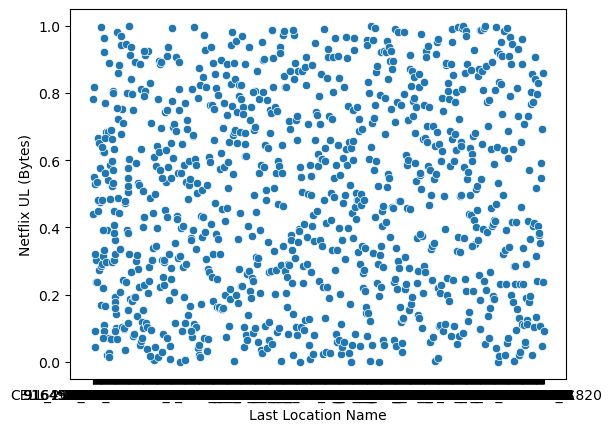

In [50]:
sns.scatterplot(data=tel[:1000], x="Last Location Name",
                y='Netflix UL (Bytes)')

<Axes: xlabel='Handset Type', ylabel='Email DL (Bytes)'>

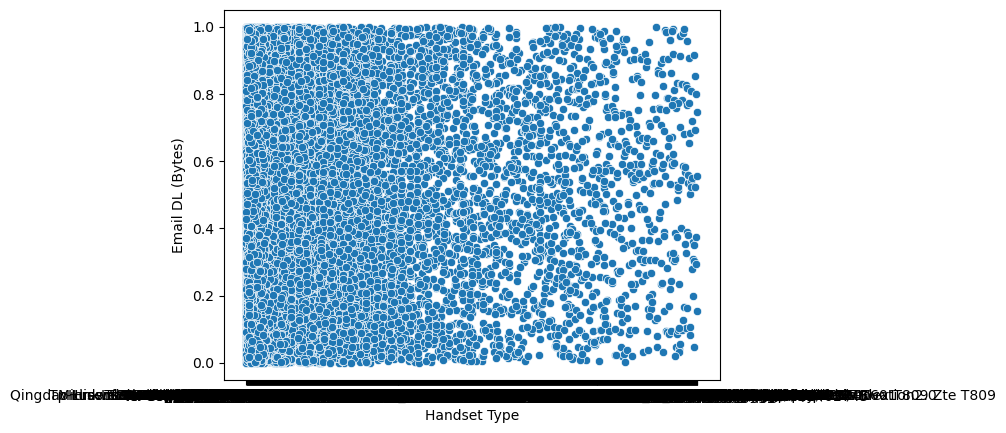

In [51]:
sns.scatterplot(data=tel, x="Handset Type",
                y='Email DL (Bytes)')

<Axes: xlabel='Handset Type', ylabel='Netflix DL (Bytes)'>

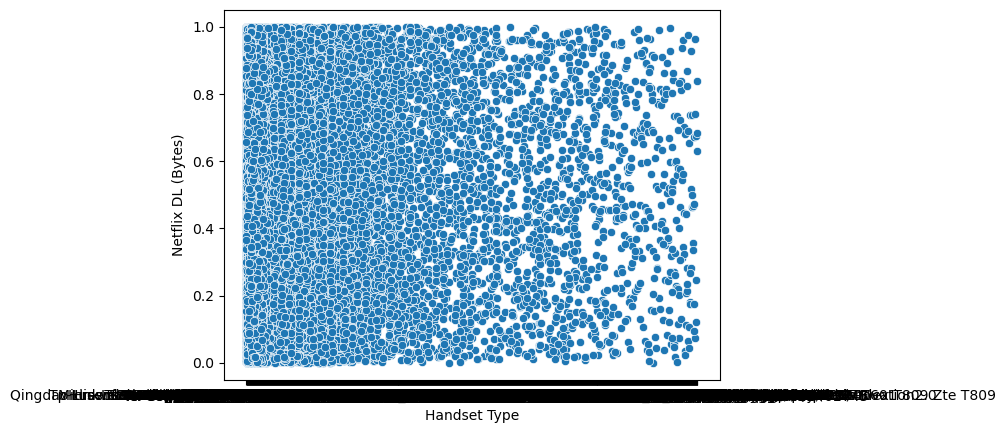

In [52]:
sns.scatterplot(data=tel, x="Handset Type",
                y='Netflix DL (Bytes)')

Interpretation:- Created scatter plots to explore relationships between various categorical features (location, handset type) and different data usage metrics.

In [53]:
user_segmentation = tel.groupby(['MSISDN/Number']).agg(
    {'Dur. (ms)': 'sum', 'Total DL (Bytes)': 'sum', 'Total UL (Bytes)':'sum'})

user_segmentation['total_data'] = user_segmentation['Total DL (Bytes)'] + user_segmentation['Total UL (Bytes)']
user_segmentation = user_segmentation.reset_index()
user_segmentation['decile_rank'] = pd.qcut(user_segmentation['Dur. (ms)'], 10, labels=False)
user_segmentation = user_segmentation.groupby('decile_rank').agg({'total_data': 'count'}).reset_index()

<Figure size 1000x700 with 0 Axes>

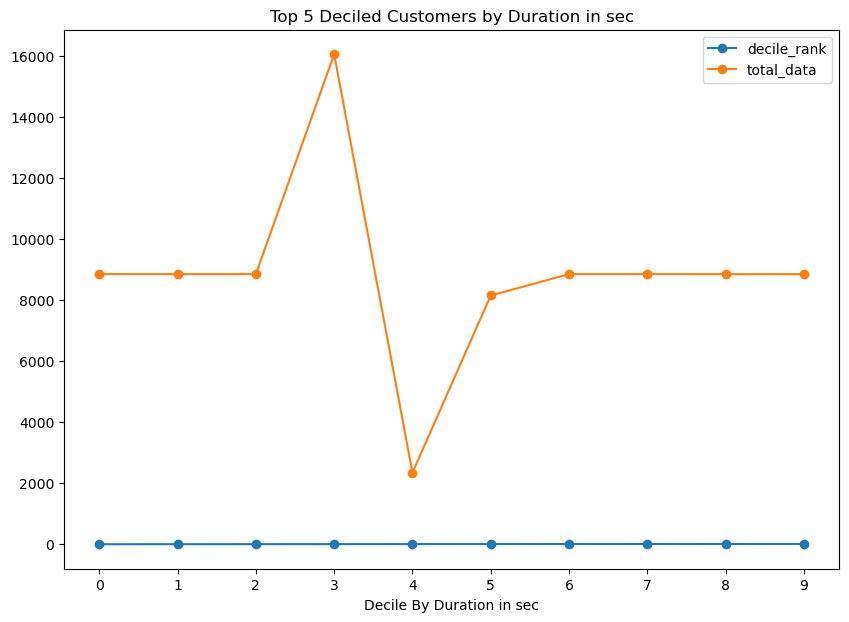

In [54]:
plt.figure(figsize=(10,7))
user_segmentation.plot(linestyle='-', marker='o', figsize=(10,7), title='Top 5 Deciled Customers by Duration in sec').set_xlabel("Decile By Duration in sec")
plt.xticks(np.arange(len(user_segmentation.index)), user_segmentation.index)

plt.show()

Interpretation:- Segments users based on their duration of usage into deciles and plots the count of users within each decile to understand data usage distribution.

<Axes: >

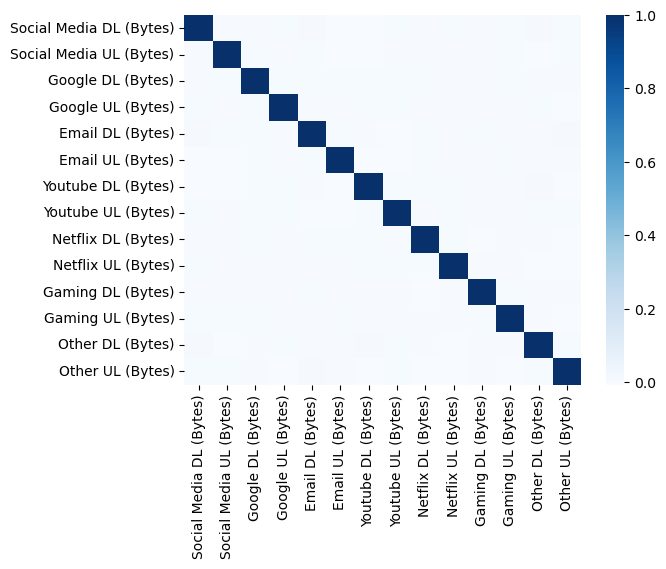

In [55]:
corr = tel[['Social Media DL (Bytes)','Social Media UL (Bytes)', 
 'Google DL (Bytes)', 'Google UL (Bytes)',
'Email DL (Bytes)', 'Email UL (Bytes)',
'Youtube DL (Bytes)','Youtube UL (Bytes)', 
'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
'Other DL (Bytes)', 'Other UL (Bytes)']].corr()

# plot the heatmap
sns.heatmap(corr,cmap='Blues',
            xticklabels=corr.columns,
            yticklabels=corr.columns)


Interpretation:- Computes and visualizes the correlation matrix of different data usage metrics to understand how they are related.

In [56]:
numeric_df = tel.select_dtypes(include='float64')
numeric_df.shape

(122221, 48)

In [57]:
scaler = StandardScaler()
scaler.fit(numeric_df)

StandardScaler()

In [58]:
scaled_data = scaler.transform(numeric_df)

In [59]:
# You must normalize the data before applying the fit method
pca = PCA(n_components=10)
pca.fit(scaled_data)

PCA(n_components=10)

In [60]:
x_pca = pca.transform(scaled_data)

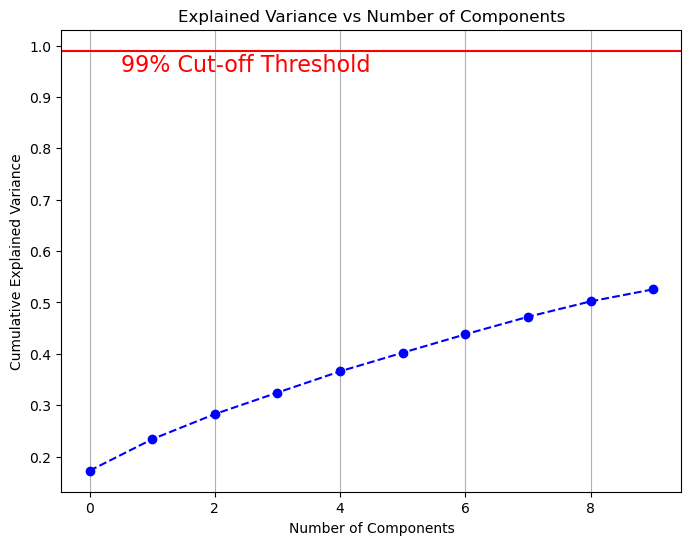

In [61]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.95, '99% Cut-off Threshold', color='red', fontsize=16)
plt.grid(axis='x')
plt.show()

Interpretation:- Applies PCA to reduce dimensionality and plots the cumulative explained variance to determine the number of principal components needed to explain 99% of the variance.

In [62]:
# Create a clean user overview file in CSV format
tel.to_csv('C:/Users/vipin/OneDrive/Documents/Desktop/Project5/Notebook/user_overview_data.csv',index=False)

Saves the cleaned and processed user data to a CSV file for future use or sharing.